In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
from keras import models
from keras import layers 
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Model
import random 

In [7]:
np.random.seed(0)

In [8]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
print("shape of X_train:" + str(X_train.shape))
print("shape of X_test:" + str(X_test.shape))
print("shape of y_train:" + str(y_train.shape))
print("shape of y_test:" + str(y_test.shape))

shape of X_train:(60000, 28, 28)
shape of X_test:(10000, 28, 28)
shape of y_train:(60000,)
shape of y_test:(10000,)


In [10]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images != number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images != number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 * 28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 * 28"

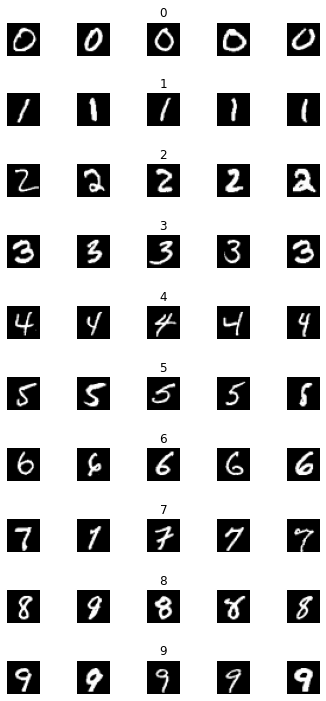

In [11]:
#plot sample grid of images from trainng dataset
num_of_samples = []
cols = 5
num_classes = 10

fig, axis = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axis[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :], cmap = plt.get_cmap("gray"))
        axis[j][i].axis("off")
        if i == 2:
            axis[j][i].set_title(str(j))
            num_of_samples.append(x_selected.shape[0])

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

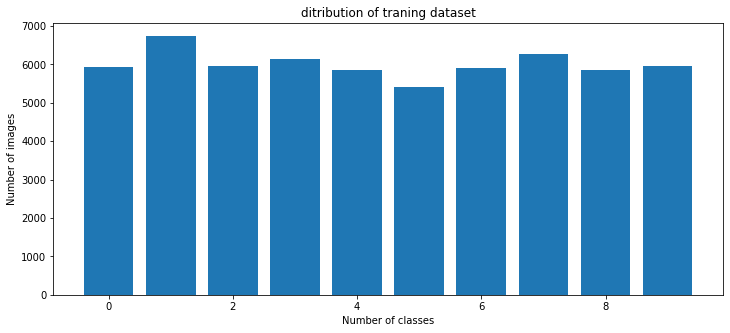

In [12]:
print(num_of_samples)
plt.figure(figsize = (12,5))
plt.bar(range(0,num_classes), num_of_samples)
plt.title("ditribution of traning dataset")
plt.xlabel("Number of classes")
plt.ylabel("Number of images")

In [13]:
#One Hot Encoding

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1 )
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [16]:
def lenet_model():
  model = tf.keras.Sequential([
                               Conv2D(30,(5,5),input_shape = (28,28,1),activation='relu', strides=1, padding='valid'),
                               MaxPooling2D(pool_size=(2,2), strides=1,padding='valid'), 
                               Conv2D(15,(3,3),activation='relu', strides=1, padding='valid'),
                               MaxPooling2D(pool_size=(2,2), strides=1,padding='valid' ), 
                               Flatten(),
                               tf.keras.layers.Dense(500, activation = 'relu'),
                               Dropout(0.6),
                               tf.keras.layers.Dense(num_classes, activation = 'softmax')])
  model.compile(optimizer = "adam", loss = 'categorical_crossentropy',metrics=['accuracy'])
  return model


In [17]:
"""def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, input_dim = num_pixels, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'relu'),
        tf.keras.layers.Dense(num_classes, activation = 'softmax')])
    model.compile(optimizer = "adam", loss = 'categorical_crossentropy',metrics=['accuracy'])
    return model"""

'def create_model():\n    model = tf.keras.Sequential([\n        tf.keras.layers.Dense(10, input_dim = num_pixels, activation = \'relu\'),\n        tf.keras.layers.Dense(10, activation = \'relu\'),\n        tf.keras.layers.Dense(num_classes, activation = \'softmax\')])\n    model.compile(optimizer = "adam", loss = \'categorical_crossentropy\',metrics=[\'accuracy\'])\n    return model'

In [18]:
model = lenet_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 15)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6000)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               3000500   
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

In [19]:
history = model.fit(X_train,y_train, validation_split= 0.1, epochs = 6, batch_size = 300, verbose = 1, shuffle = 1)

Epoch 1/6
180/180 [==============================] - 84s 462ms/step - loss: 0.4795 - accuracy: 0.8518 - val_loss: 0.0546 - val_accuracy: 0.9827
Epoch 2/6
180/180 [==============================] - 82s 457ms/step - loss: 0.0795 - accuracy: 0.9754 - val_loss: 0.0416 - val_accuracy: 0.9875
Epoch 3/6
180/180 [==============================] - 82s 456ms/step - loss: 0.0534 - accuracy: 0.9830 - val_loss: 0.0345 - val_accuracy: 0.9903
Epoch 4/6
180/180 [==============================] - 82s 456ms/step - loss: 0.0392 - accuracy: 0.9879 - val_loss: 0.0314 - val_accuracy: 0.9918
Epoch 5/6
180/180 [==============================] - 82s 454ms/step - loss: 0.0356 - accuracy: 0.9892 - val_loss: 0.0316 - val_accuracy: 0.9917
Epoch 6/6
180/180 [==============================] - 82s 454ms/step - loss: 0.0306 - accuracy: 0.9906 - val_loss: 0.0310 - val_accuracy: 0.9920


Text(0.5, 0, 'epoch')

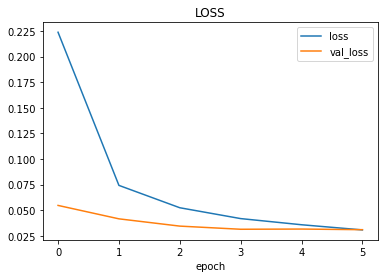

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('LOSS')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

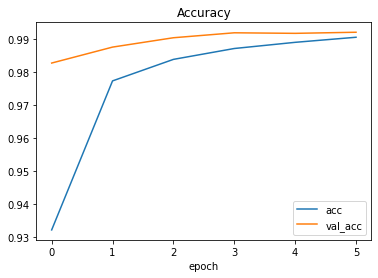

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [22]:
score = model.evaluate(X_test,y_test, verbose =0)
print(type(score))
print("test score:", score[0])
print("test accuracy:", score[1])
 

<class 'list'>
test score: 0.020854748785495758
test accuracy: 0.9922000169754028


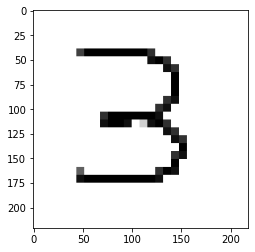

In [23]:
import requests
from PIL import Image

url = 'https://www.neuralnine.com/wp-content/uploads/2019/09/3.png'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)


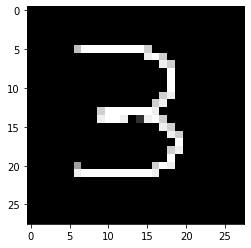

In [24]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap("gray"))

In [25]:
image = image/255
image = image.reshape(1,28,28,1)


In [26]:
prediction = model.predict_classes(image)
print("predicted digit:", str(prediction))

predicted digit: [3]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [27]:
layer1 = Model(inputs = model.layers[0].input, outputs = model.layers[0].output) 
layer2 = Model(inputs = model.layers[0].input, outputs = model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(image),layer2.predict(image)
print(visual_layer1.shape) 
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 21, 21, 15)


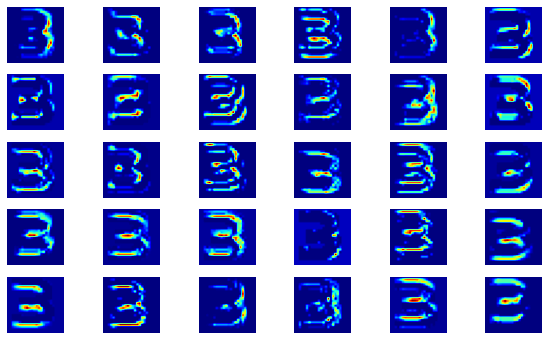

In [34]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(5,6,i+1)
  plt.imshow(visual_layer1[0,:,:,i], cmap=plt.get_cmap('jet'))
  plt.axis('off')

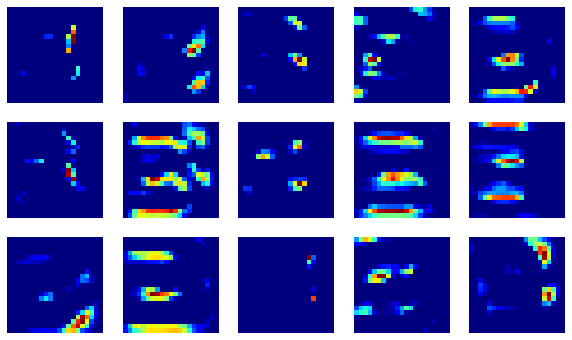

In [33]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(visual_layer2[0,:,:,i], cmap=plt.get_cmap('jet'))
  plt.axis('off')